In [1]:
!pip install yfinance
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

import yfinance as yf

from sklearn.linear_model import LinearRegression

In [2]:
# Get the data of the Apple stock (code AAPL)
data = yf.download('AAPL','2019-01-01','2020-04-30')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,158.529999,159.360001,156.479996,157.740005,154.618546,35003500
2019-01-02,154.889999,158.850006,154.229996,157.919998,154.794983,37039700
2019-01-03,143.979996,145.720001,142.000000,142.190002,139.376251,91312200
2019-01-04,144.529999,148.550003,143.800003,148.259995,145.326126,58607100
2019-01-07,148.699997,148.830002,145.899994,147.929993,145.002686,54777800


In [3]:
df = pd.DataFrame(data, columns=['Close'])
df = df.reset_index()
df.isna().values.any() # check for NaN

False

In [4]:
def show(name) :
    # Get the data of the Apple stock (code AAPL)
    data = yf.download(name,'2019-01-01','2020-04-30')
    data.head()

    df = pd.DataFrame(data, columns=['Close'])
    df = df.reset_index()
    df.isna().values.any() # check for NaN

    months = mdates.MonthLocator() # Get every year
    dateFmt = mdates.DateFormatter('%Y-%m') # Set year format

    # Create subplots to plot graph and control axes
    fig, ax = plt.subplots()
    ax.plot(df['Date'], df['Close'])

    # Format the ticks
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(dateFmt)

    # Set figure title
    plt.title(name +' Close Stock Price History [2019 - 2020]', fontsize=16)
    # Set x label
    plt.xlabel('Date', fontsize=14)
    # Set y label
    plt.ylabel('Closing Stock Price in $', fontsize=14)

    # Rotate and align the x labels
    fig.autofmt_xdate()

    # Show plot
    plt.show()

[*********************100%***********************]  1 of 1 completed


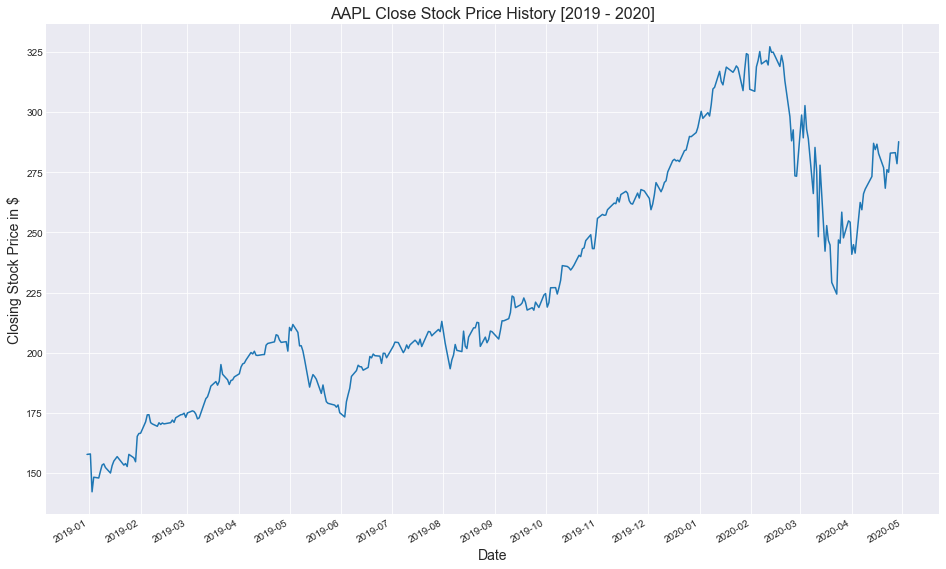

[*********************100%***********************]  1 of 1 completed


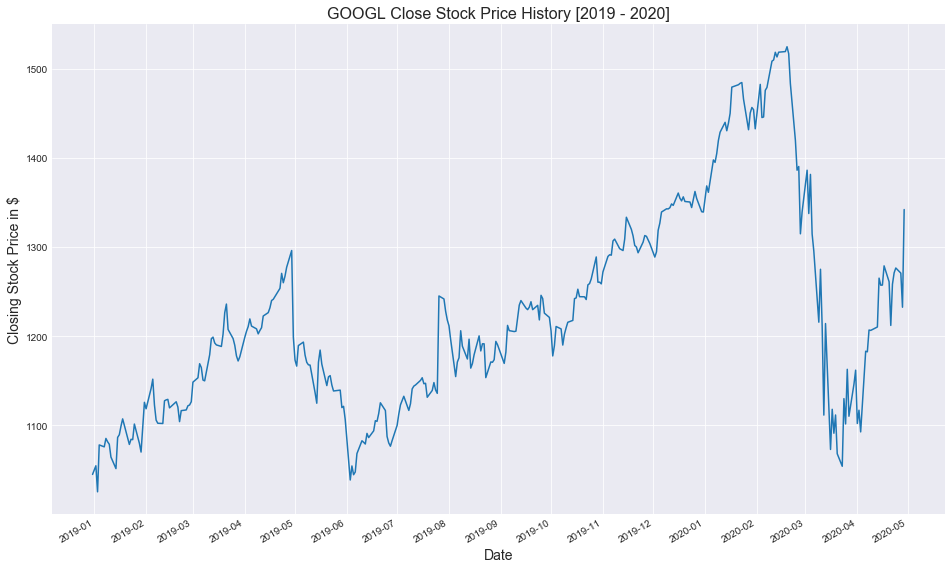

[*********************100%***********************]  1 of 1 completed


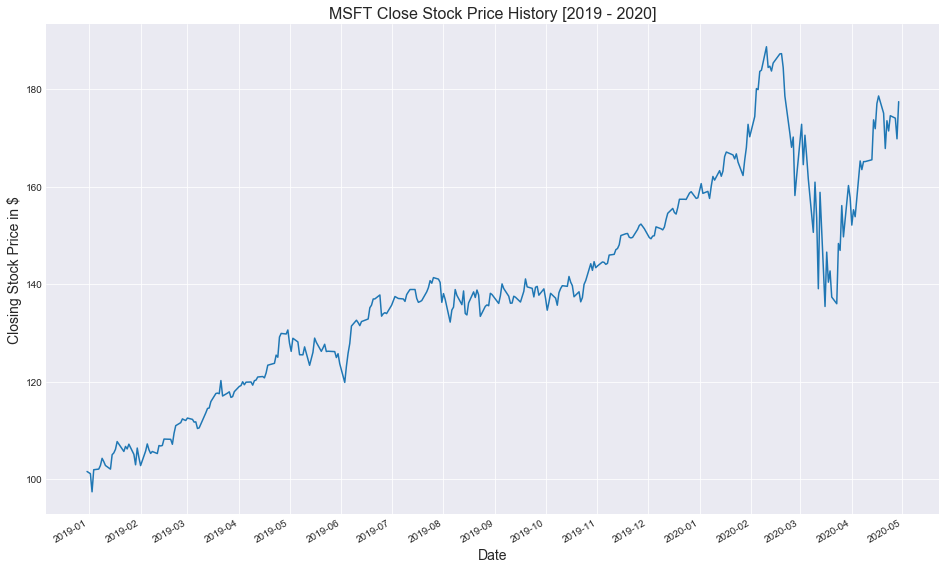

[*********************100%***********************]  1 of 1 completed


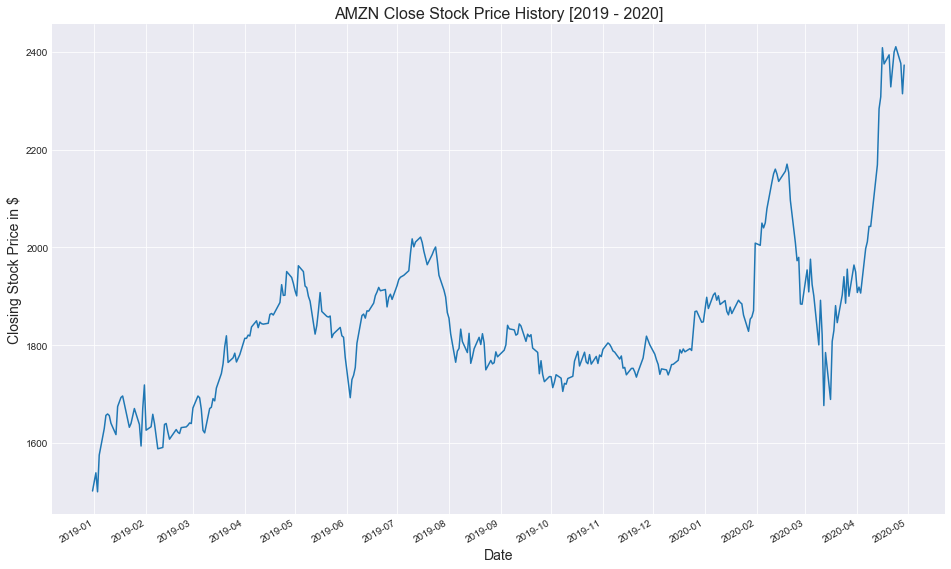

[*********************100%***********************]  1 of 1 completed


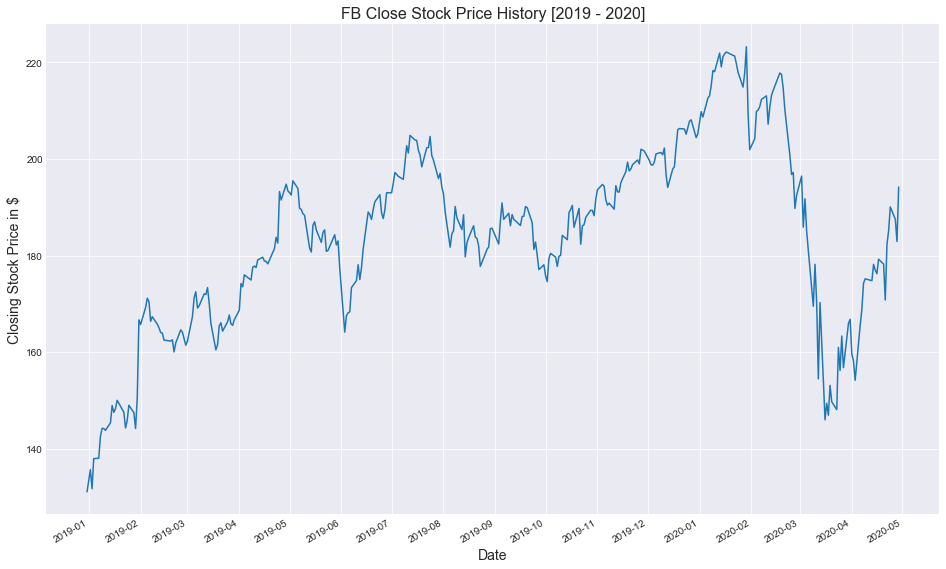

In [5]:
# show all stock's graph of Big5
show('AAPL')
show('GOOGL')
show('MSFT')
show('AMZN')
show('FB')

In [6]:
def get_close_stock_price(codes, start_date='2019-01-01', end_date='2020-04-30'):
    data = { code : yf.download(code, start_date, end_date) for code in codes }
    data = { key : pd.DataFrame(value, columns=['Close']).rename(columns={'Close': f'{key}'}) for key, value in data.items() }
    df = None
    for key, value in data.items():
        if df is None:
            df = value
        else:
            df = df.merge(value, left_index=True, right_index=True)
    return df

df = get_close_stock_price(['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB'])
df.to_csv('DataML/data1.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
df = pd.read_csv('DataML/data1.csv', index_col=['Date'], infer_datetime_format=True, parse_dates=['Date'])
df.head()

,AAPL,GOOGL,MSFT,AMZN,FB
Date,,,,,
2018-12-31,157.740005,1044.959961,101.570000,1501.969971,131.089996
2019-01-02,157.919998,1054.680054,101.120003,1539.130005,135.679993
2019-01-03,142.190002,1025.469971,97.400002,1500.280029,131.740005
2019-01-04,148.259995,1078.069946,101.930000,1575.390015,137.949997
2019-01-07,147.929993,1075.920044,102.059998,1629.510010,138.050003


In [8]:
df.index

DatetimeIndex(['2018-12-31', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2020-04-16', '2020-04-17', '2020-04-20', '2020-04-21',
               '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-27',
               '2020-04-28', '2020-04-29'],
              dtype='datetime64[ns]', name='Date', length=335, freq=None)

In [9]:
df_plot = df.reset_index().melt('Date', var_name='cols',  value_name='vals')
df_plot.isna().values.any()

False

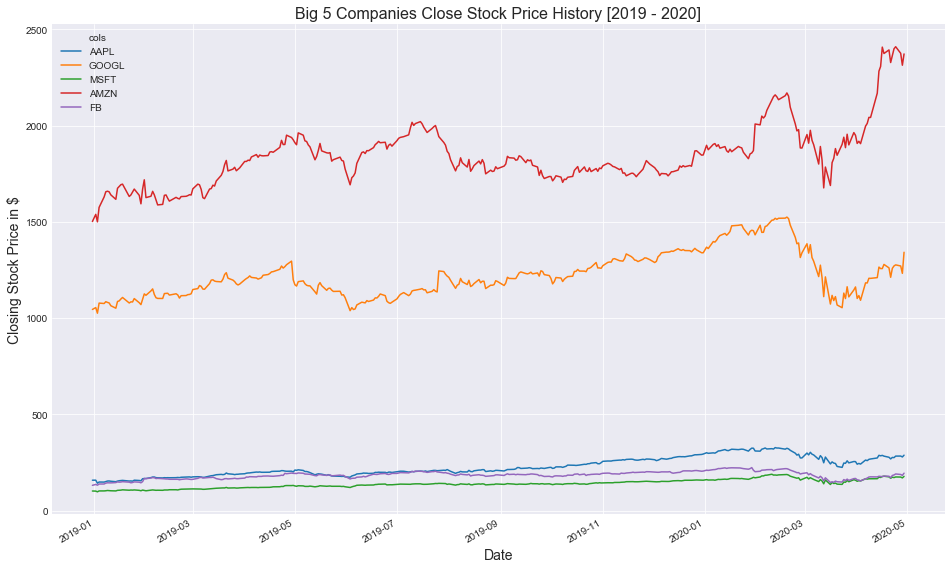

In [10]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x="Date", y="vals", hue='cols', data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Big 5 Companies Close Stock Price History [2019 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [11]:

#The question 4 .
# history = 5 is the best history which i try for model to learn
history = 5
# use 6/10 of the dataset to train (use past price to predict future price) 
ratio_train_test = 6 

# My model : I use the stock's history of each company to predict the stock's furute of that company .


In [12]:
def create_Xy(df, history=1):
    '''df has index as date
    columns are stock price of the companies
    '''
    X, y, dates = [], [], []
    for row_idx in range(history, len(df)):
        y.append( df.iloc[row_idx,:].values.reshape(-1) )
        X.append( df.iloc[row_idx-history:row_idx,:].values.reshape(-1) )
        dates.append(df.index[row_idx])
    X, y = np.array(X), np.array(y)
    return X, y, dates

X,y,dates = create_Xy(df, history)

n_train = len(y) * ratio_train_test // 10
X_train, y_train, dates_train, X_test, y_test, dates_test = X[:n_train], y[:n_train], dates[:n_train], X[n_train:], y[n_train:], dates[n_train:]

In [13]:

# Take X_train , y_train , x_test of AAPL's stock .

AAPL_x_train = []
for i in range(0, len(X_train)):
    AAPL_x_train.append([])
    for j in range(0, history):
        AAPL_x_train[i].append(X_train[i][j*history])
        
AAPL_y_train = []
for i in range(0, len(y_train)):
        AAPL_y_train.append(y_train[i][0])
        
AAPL_x_test = []
for i in range(0, len(X_test)):
    AAPL_x_test.append([])
    for j in range(0, history):
        AAPL_x_test[i].append(X_test[i][j*history])
    

In [14]:
# Take X_train , y_train , x_test of Googl stock .

GOOGL_x_train = []
for i in range(0, len(X_train)):
    GOOGL_x_train.append([])
    for j in range(0, history):
        GOOGL_x_train[i].append(X_train[i][1+j*history])
        
GOOGL_y_train = []
for i in range(0, len(y_train)):
        GOOGL_y_train.append(y_train[i][1])
        
GOOGL_x_test = []
for i in range(0, len(X_test)):
    GOOGL_x_test.append([])
    for j in range(0, history):
        GOOGL_x_test[i].append(X_test[i][1+j*history])
        

In [15]:
# Take X_train , y_train , x_test of MSFT stock .     

MSFT_x_train = []
for i in range(0, len(X_train)):
    MSFT_x_train.append([])
    for j in range(0, history):
        MSFT_x_train[i].append(X_train[i][2+j*history])
        
MSFT_y_train = []
for i in range(0, len(y_train)):
        MSFT_y_train.append(y_train[i][2])
        
MSFT_x_test = []
for i in range(0, len(X_test)):
    MSFT_x_test.append([])
    for j in range(0, history):
        MSFT_x_test[i].append(X_test[i][2+j*history])

In [16]:
# Take X_train , y_train , x_test of AMZN stock .
        
AMZN_x_train = []
for i in range(0, len(X_train)):
    AMZN_x_train.append([])
    for j in range(0, history):
        AMZN_x_train[i].append(X_train[i][3+j*history])
        
AMZN_y_train = []
for i in range(0, len(y_train)):
        AMZN_y_train.append(y_train[i][3])
        
AMZN_x_test = []
for i in range(0, len(X_test)):
    AMZN_x_test.append([])
    for j in range(0, history):
        AMZN_x_test[i].append(X_test[i][3+j*history])

In [17]:
# Take X_train , y_train , x_test of FB stock .

FB_x_train = []
for i in range(0, len(X_train)):
    FB_x_train.append([])
    for j in range(0, history):
        FB_x_train[i].append(X_train[i][4+j*history])
        
FB_y_train = []
for i in range(0, len(y_train)):
        FB_y_train.append(y_train[i][4])
        
FB_x_test = []
for i in range(0, len(X_test)):
    FB_x_test.append([])
    for j in range(0, history):
        FB_x_test[i].append(X_test[i][4+j*history])

In [19]:
clf = LinearRegression()

clf.fit(AAPL_x_train, AAPL_y_train)
AAPL_y_pred = clf.predict(AAPL_x_test)

clf.fit(GOOGL_x_train, GOOGL_y_train)
GOOGL_y_pred = clf.predict(GOOGL_x_test)

clf.fit(MSFT_x_train, MSFT_y_train)
MSFT_y_pred = clf.predict(MSFT_x_test)

clf.fit(AMZN_x_train, AMZN_y_train)
AMZN_y_pred = clf.predict(AMZN_x_test)

clf.fit(FB_x_train, FB_y_train)
FB_y_pred = clf.predict(FB_x_test)

In [20]:
#Funtion : Draw Graph
def showResult(n ,name ,y_pred):
    df_plot = pd.DataFrame({name +"_true": y_test[:,n], name +'_pred': y_pred}, index=dates_test)

    # Create subplots to plot graph and control axes
    fig, ax = plt.subplots(figsize=(16,10))
    sns.lineplot(data=df_plot)

    # Format the ticks
    loc = mdates.AutoDateLocator()
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

    # Set figure title
    plt.title(name +' stock price: True vs. Prediction', fontsize=16)
    # Set x label
    plt.xlabel('Date', fontsize=14)
    # Set y label
    plt.ylabel('Closing Stock Price in $', fontsize=14)

    # Rotate and align the x labels
    fig.autofmt_xdate()

    # Show plot
    plt.show()

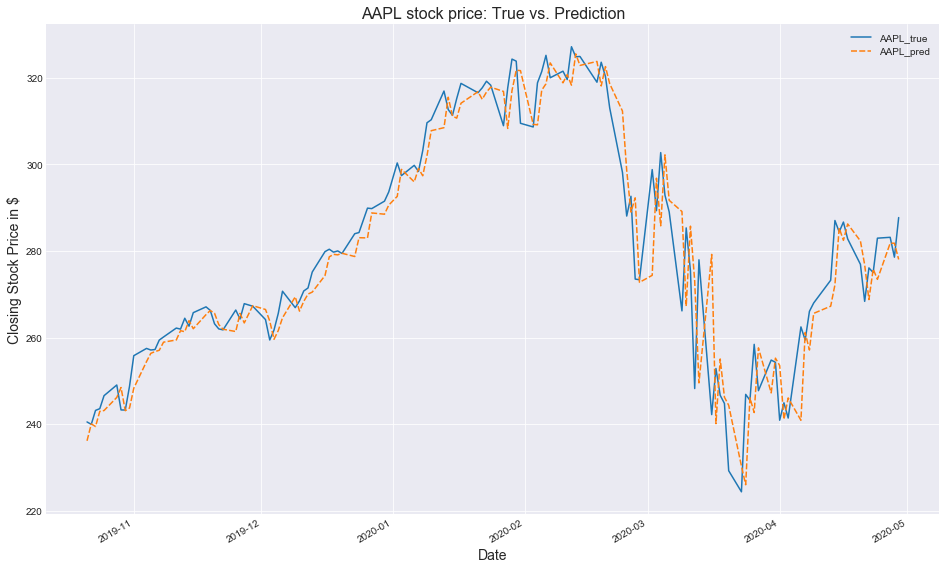

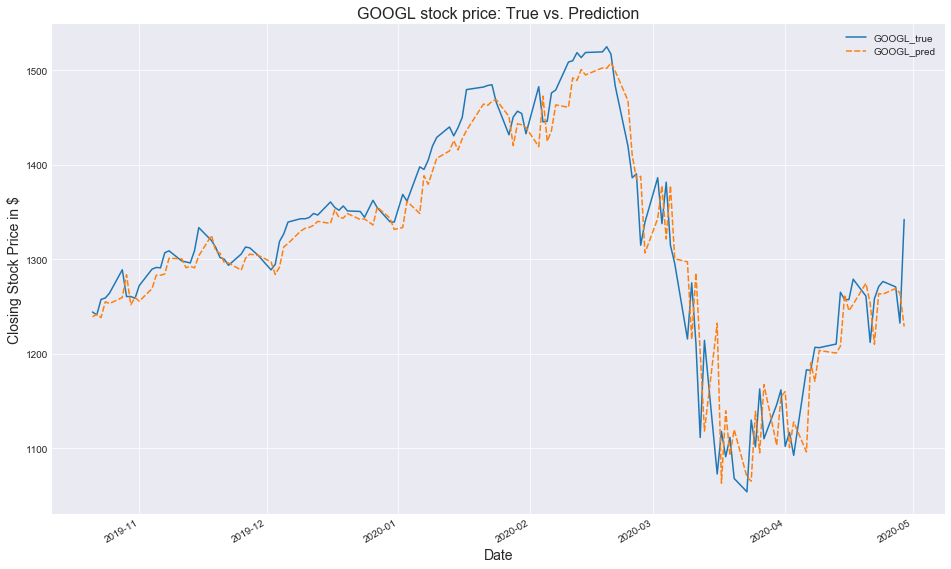

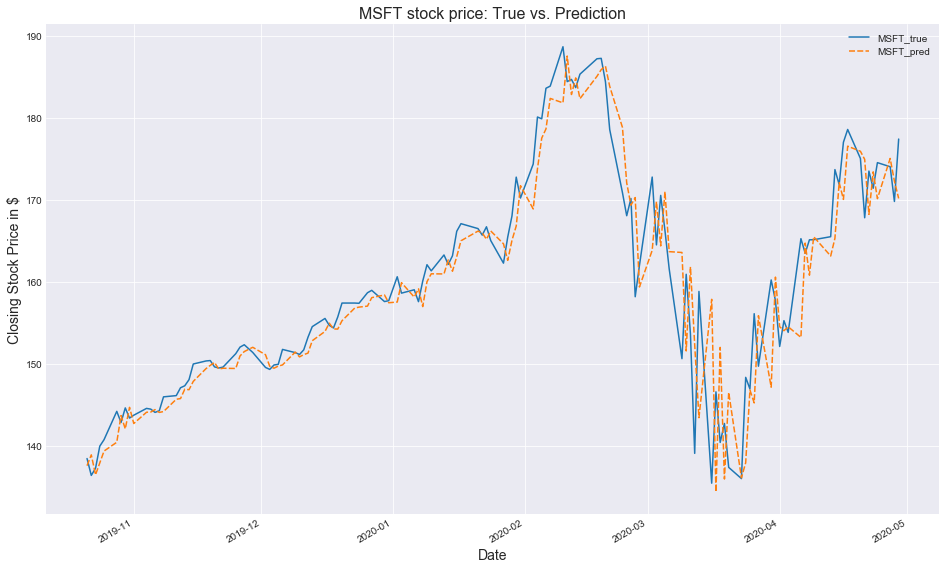

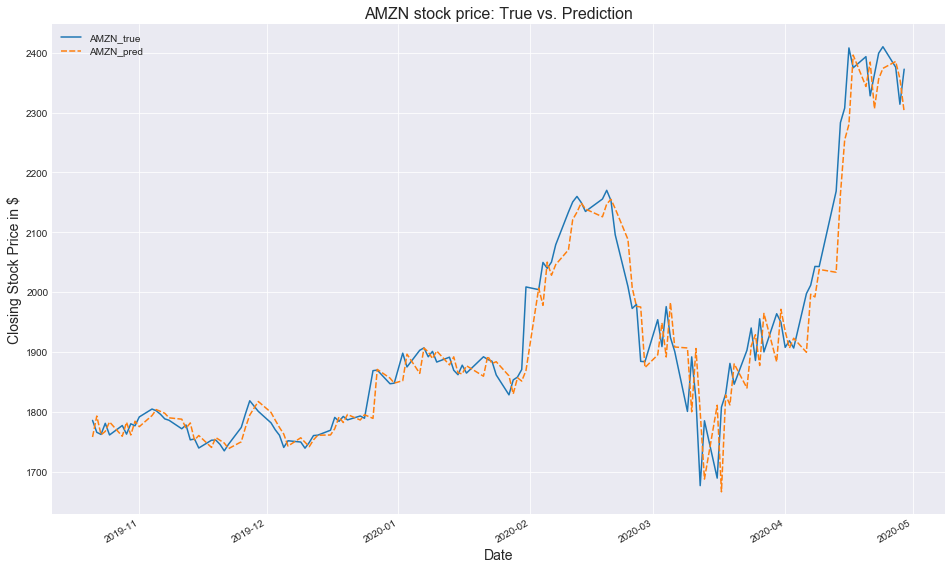

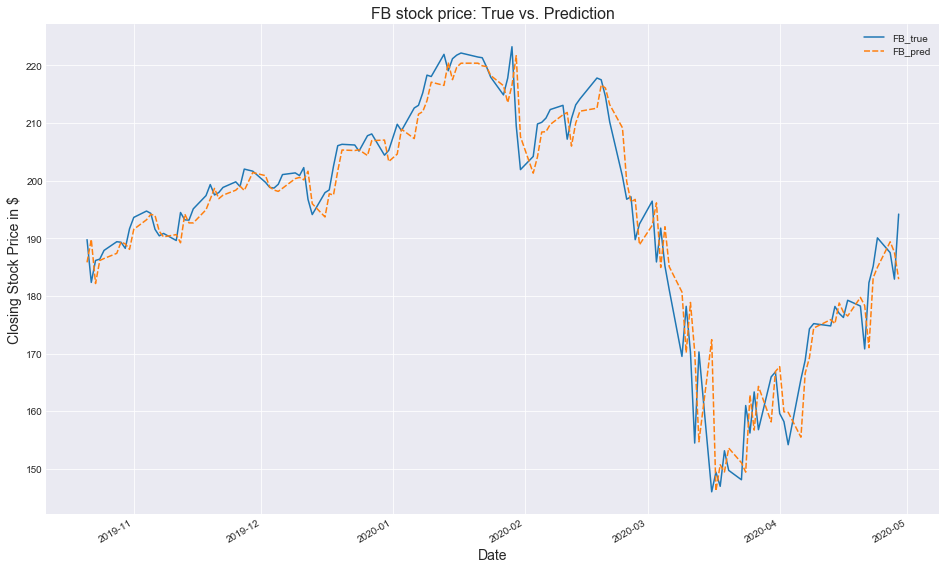

In [21]:
# graph of Result .
showResult(0 , 'AAPL' ,AAPL_y_pred)
showResult(1 , 'GOOGL',GOOGL_y_pred)
showResult(2 , 'MSFT' ,MSFT_y_pred)
showResult(3 , 'AMZN' ,AMZN_y_pred)
showResult(4 , 'FB' ,FB_y_pred)

In [22]:
from sklearn.metrics import mean_squared_error
def mean_relative_error(y_true , y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))
#The question 5 . 

#the lowest error rate after i try with my model 

print(mean_relative_error(y_test[:,0],AAPL_y_pred))
print(mean_relative_error(y_test[:,1],GOOGL_y_pred))
print(mean_relative_error(y_test[:,2],MSFT_y_pred))
print(mean_relative_error(y_test[:,3],AMZN_y_pred))
print(mean_relative_error(y_test[:,4],FB_y_pred))


0.021061434211349317
0.020087960159066894
0.020715605904175167
0.016646823560081316
0.020498444284151547
